## Importazione e pulizia dati

In [60]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
filename = r'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master'+\
           r'/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
import urllib  # the lib that handles the url stuff

data = urllib.request.urlopen(filename)
lines=[]
for line in data:
    decoded_line = line.decode("utf-8")
    lines.append(decoded_line.split(','))
df = pd.DataFrame(lines[1:], columns=lines[0])

In [3]:
df['data'] = pd.to_datetime(df['data'])

In [4]:
df.replace('', np.nan, inplace=True)
for col in df.columns:
    try:
        df[col] = df[col].apply(float)
    except:
        pass

## Andamento contagi e decessi

In [5]:
z = df['deceduti']

In [6]:
df['diff_deceduti'] = np.r_[z[0], np.diff(z)]

<AxesSubplot:xlabel='data'>

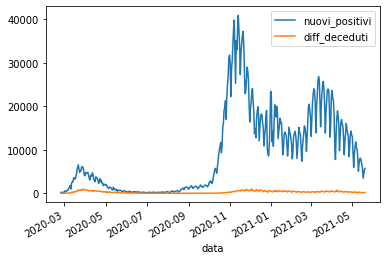

In [7]:
ax = df.plot('data', 'nuovi_positivi')
df.plot('data', 'diff_deceduti',ax =ax)

In [8]:
df['Perc_dec'] = df['diff_deceduti']/df['nuovi_positivi']

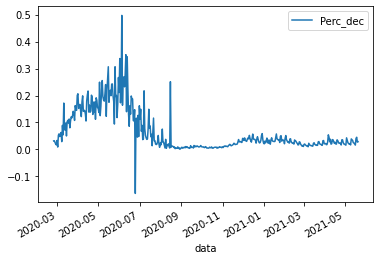

In [9]:
ax = df.plot('data', 'Perc_dec')

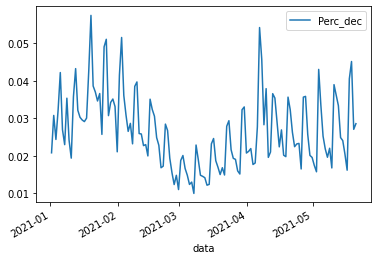

In [10]:
ax = df[df.data>'01.01.2021'].plot('data', 'Perc_dec')

## Andamento contagi e decessi su base settimanale

In [11]:
df_week = df.set_index('data').resample('W').mean()

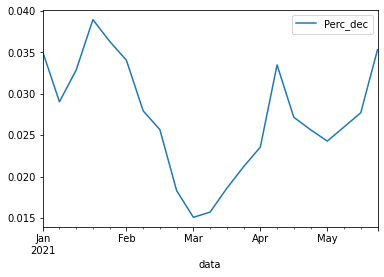

In [12]:
ax = df_week.loc['01.01.2021':].reset_index().plot('data','Perc_dec')

<AxesSubplot:xlabel='data'>

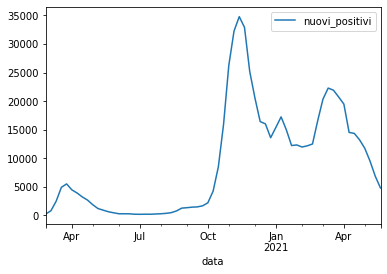

In [13]:
df_week.reset_index().plot('data','nuovi_positivi')

## Andamento dei tamponi molecolari

In [14]:
df['nuovi_tamp_mol'] = np.r_[df['tamponi_test_molecolare'][0], np.diff(df['tamponi_test_molecolare'])]
df['pos_tamp_mol'] = np.r_[df['totale_positivi_test_molecolare'][0], np.diff(df['totale_positivi_test_molecolare'])]

<AxesSubplot:xlabel='data'>

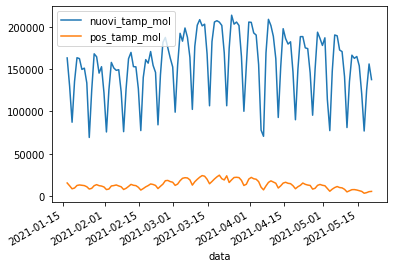

In [15]:
ax = df.plot('data','nuovi_tamp_mol')
df.plot('data','pos_tamp_mol', ax=ax)

### Interessante andamento dei tamponi molecolari con il giorno della settimana

In [16]:
df['day'] = df.data.dt.dayofweek #day_name()
df['%tamp_pos'] = df['pos_tamp_mol']/df['nuovi_tamp_mol']*100

<AxesSubplot:xlabel='day'>

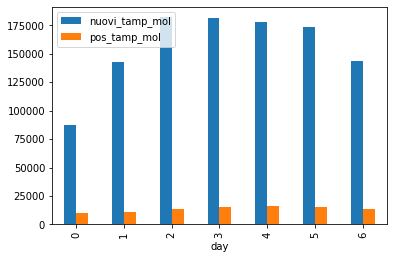

In [17]:
df.groupby('day')[['nuovi_tamp_mol','pos_tamp_mol']].mean().plot.bar() #0 = Monday

<AxesSubplot:xlabel='day'>

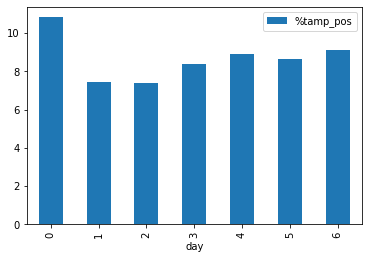

In [18]:
df.groupby('day')[['%tamp_pos']].mean().plot.bar()

## Andamento province

In [38]:
filename = r'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master'+\
           r'/dati-province/dpc-covid19-ita-province.csv'

data = urllib.request.urlopen(filename)
lines_prov=[]
for line in data:
    decoded_line = line.decode("utf-8")
    lines_prov.append(decoded_line.split(','))

lines_prov[0].extend(['null', 'null'])
df_prov = pd.DataFrame(lines_prov[1:], columns=lines_prov[0])

In [39]:
df_prov['data'] = pd.to_datetime(df_prov['data'])

In [51]:
df_prov.replace('', np.nan, inplace=True)
for col in df_prov.columns:
    try:
        df_prov[col] = df_prov[col].apply(float)
    except:
        pass

In [52]:
df_prov.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione',
       'codice_provincia', 'denominazione_provincia', 'sigla_provincia', 'lat',
       'long', 'totale_casi', 'note', 'codice_nuts_1', 'codice_nuts_2',
       'codice_nuts_3\n', 'null', 'null'],
      dtype='object')

In [58]:
df_prov_reg = df_prov.groupby(['data','denominazione_regione'])['totale_casi'].sum().reset_index()

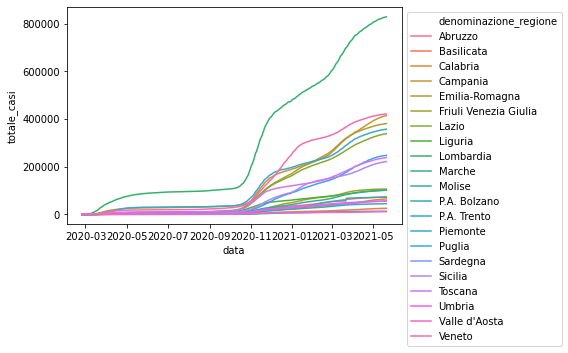

In [62]:
sns.lineplot(data=df_prov_reg, x='data', y='totale_casi', hue='denominazione_regione')
plt.legend(bbox_to_anchor=(1,1))

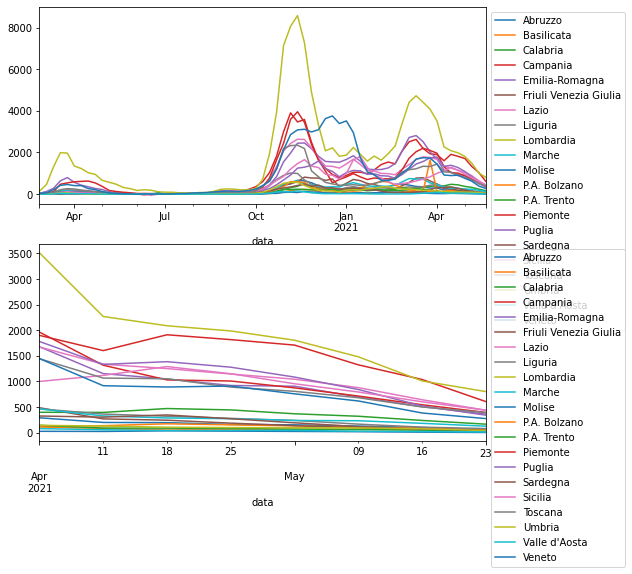

In [95]:
fig, ax = plt.subplots(2,1, figsize=(8,8))
for prov, group in df_prov_reg.groupby('denominazione_regione'):
    group['nuovi_positivi'] = np.r_[group['totale_casi'].iloc[0], np.diff(group['totale_casi'])]
    
    group_week = group.set_index('data').resample('W').mean()
    group_week.reset_index().plot('data', 'nuovi_positivi', label=prov, ax=ax[0])
    group_week.loc['04-01-2021':].reset_index().plot('data', 'nuovi_positivi', label=prov, ax=ax[1])
ax[1].legend(bbox_to_anchor=(1,1))
ax[0].legend(bbox_to_anchor=(1,1))

In [66]:
df_lomb = df_prov[df_prov['denominazione_regione'] == 'Lombardia'].copy()

In [67]:
df_lomb.denominazione_provincia.unique()

array(['Varese', 'Como', 'Sondrio', 'Milano', 'Bergamo', 'Brescia',
       'Pavia', 'Cremona', 'Mantova', 'Lecco', 'Lodi',
       'Monza e della Brianza', 'In fase di definizione/aggiornamento',
       'Fuori Regione / Provincia Autonoma'], dtype=object)

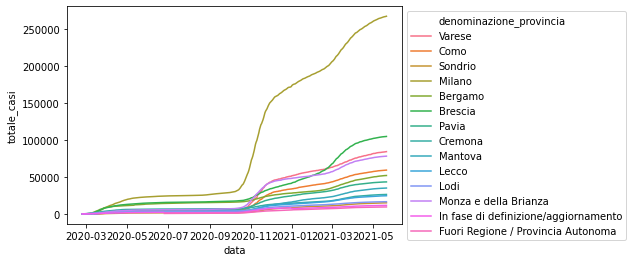

In [68]:
sns.lineplot(data=df_lomb, x='data', y='totale_casi', hue='denominazione_provincia')
plt.legend(bbox_to_anchor=(1,1))

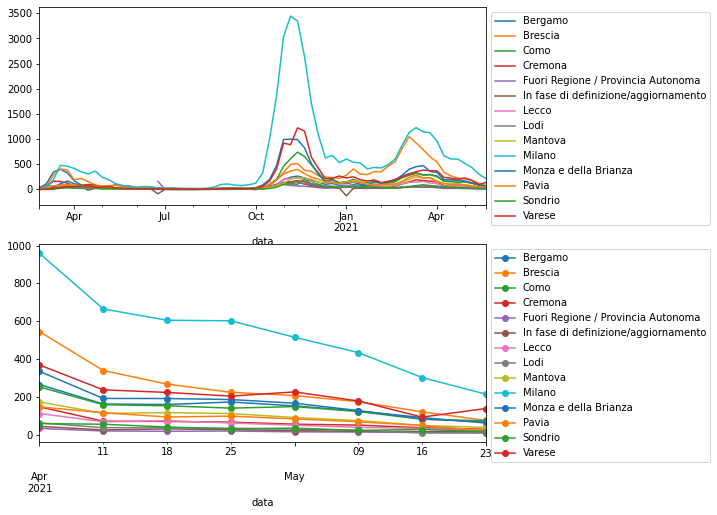

In [96]:
fig, ax = plt.subplots(2,1, figsize=(8,8))
for prov, group in df_lomb.groupby('denominazione_provincia'):
    group['nuovi_positivi'] = np.r_[group['totale_casi'].iloc[0], np.diff(group['totale_casi'])]
    
    group_week = group.set_index('data').resample('W').mean()
    group_week.reset_index().plot('data', 'nuovi_positivi', label=prov, ax=ax[0])
    group_week.loc['04-01-2021':].reset_index().plot('data', 'nuovi_positivi', label=prov, ax=ax[1], marker='o')
ax[1].legend(bbox_to_anchor=(1,1))
ax[0].legend(bbox_to_anchor=(1,1))

## Dati per regione

In [121]:
filename_reg = r'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master'+\
           r'/dati-regioni/dpc-covid19-ita-regioni.csv'

df_reg = pd.read_csv(filename_reg)

In [125]:
df_reg['data'] = pd.to_datetime(df_reg['data'])

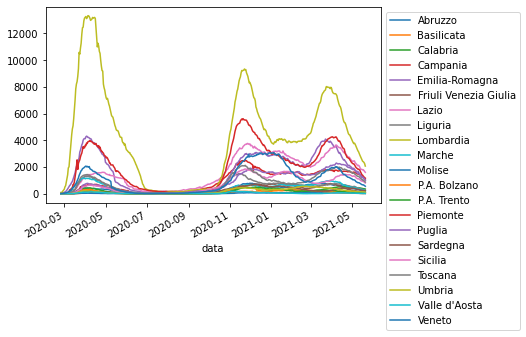

In [130]:
fig, ax = plt.subplots(1,1)
for reg, group in df_reg.groupby('denominazione_regione'):
    group.plot.line('data', 'totale_ospedalizzati',ax=ax, label=reg)
plt.legend(bbox_to_anchor=(1,1))

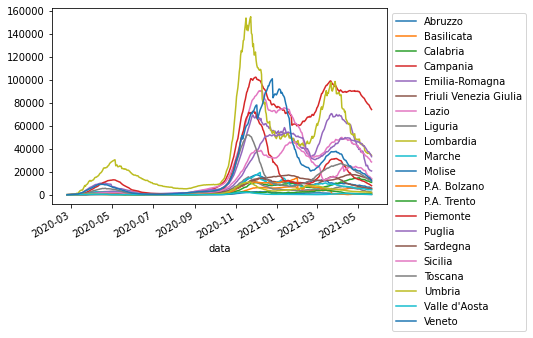

In [132]:
fig, ax = plt.subplots(1,1)
for reg, group in df_reg.groupby('denominazione_regione'):
    group.plot.line('data', 'isolamento_domiciliare',ax=ax, label=reg)
plt.legend(bbox_to_anchor=(1,1))

# Dati anagrafici regione

In [133]:
filename_anag = r'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master'+\
           r'/dati-statistici-riferimento/popolazione-istat-regione-range.csv'

df_anag = pd.read_csv(filename_anag)

In [137]:
pop_reg = dict(df_anag.groupby('denominazione_regione')['totale_generale'].sum())

Text(0, 0.5, 'Nuovi casi per 1000 abitanti')

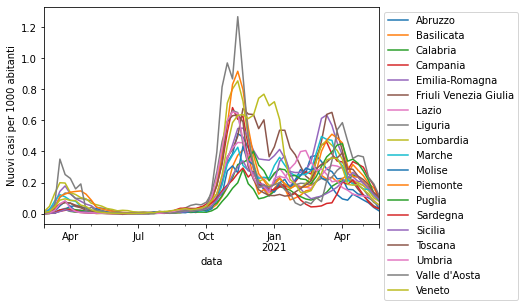

In [144]:
fig, ax = plt.subplots(1,1)
for reg, group in df_reg.groupby('denominazione_regione'):
    if (reg != 'P.A. Bolzano')&(reg != 'P.A. Trento'):
        group['positivi_normalizzati'] = group['nuovi_positivi']/pop_reg[reg]*1000
        group_week = group.set_index('data').resample('W').mean()
        group_week.reset_index().plot.line('data', 'positivi_normalizzati',ax=ax, label=reg)
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel('Nuovi casi per 1000 abitanti')

In [160]:
group_reg = df_anag[['descrizione_nuts_1', 'denominazione_regione']].drop_duplicates()
group_reg = dict(zip(group_reg['denominazione_regione'], group_reg['descrizione_nuts_1']))

No handles with labels found to put in legend.


Text(0.5, 0.98, 'Nuovi casi per 1000 abitanti')

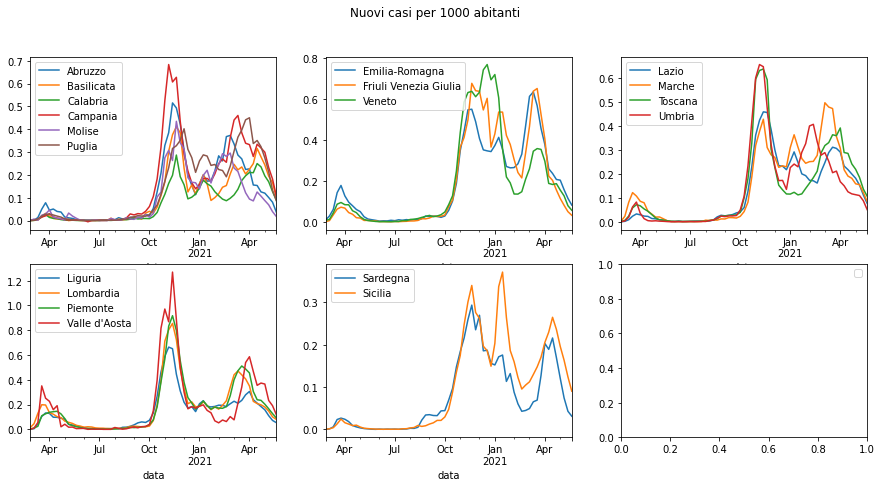

In [186]:
fig, axes = plt.subplots(2,3, figsize=(15, 7))
ax_flat = axes.flatten()
index = dict(zip(df_anag['descrizione_nuts_1'].unique(), list(range(df_anag['descrizione_nuts_1'].nunique()))))
for reg, group in df_reg.groupby('denominazione_regione'):
    if (reg != 'P.A. Bolzano')&(reg != 'P.A. Trento'):
        group['positivi_normalizzati'] = group['nuovi_positivi']/pop_reg[reg]*1000
        group_week = group.set_index('data').resample('W').mean()
        ax = ax_flat[index[group_reg[reg]]]
        group_week.reset_index().plot.line('data', 'positivi_normalizzati',ax=ax, label=reg)
plt.legend(bbox_to_anchor=(1,1))
plt.suptitle('Nuovi casi per 1000 abitanti')

No handles with labels found to put in legend.


Text(0.5, 0.98, 'Casi ospedalizzati per 1000 abitanti')

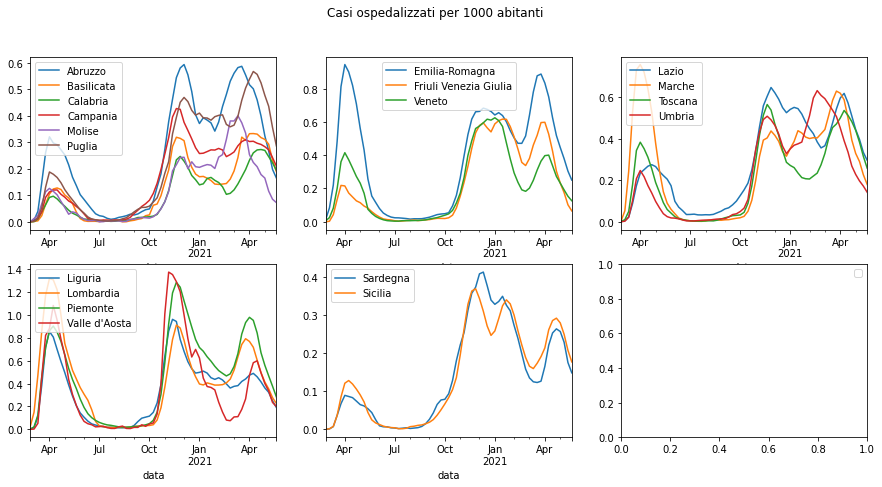

In [193]:
fig, axes = plt.subplots(2,3, figsize=(15, 7))
ax_flat = axes.flatten()
index = dict(zip(df_anag['descrizione_nuts_1'].unique(), list(range(df_anag['descrizione_nuts_1'].nunique()))))
for reg, group in df_reg.groupby('denominazione_regione'):
    if (reg != 'P.A. Bolzano')&(reg != 'P.A. Trento'):
        group['osped_normalizzati'] = group['totale_ospedalizzati']/pop_reg[reg]*1000
        group_week = group.set_index('data').resample('W').mean()
        ax = ax_flat[index[group_reg[reg]]]
        group_week.reset_index().plot.line('data', 'osped_normalizzati',ax=ax, label=reg)
plt.legend(bbox_to_anchor=(1,1))
plt.suptitle('Casi ospedalizzati per 1000 abitanti')

No handles with labels found to put in legend.


Text(0.5, 0.98, 'Casi in isolamento per 1000 abitanti')

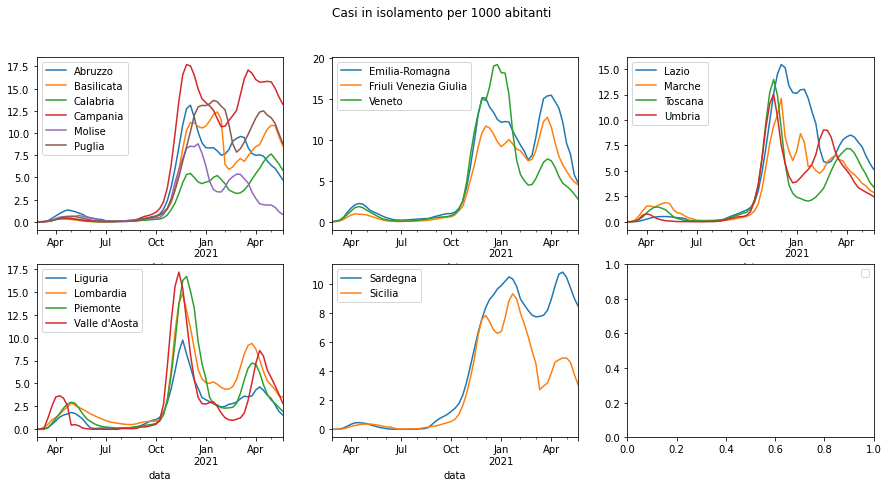

In [191]:
fig, axes = plt.subplots(2,3, figsize=(15, 7))
ax_flat = axes.flatten()
index = dict(zip(df_anag['descrizione_nuts_1'].unique(), list(range(df_anag['descrizione_nuts_1'].nunique()))))
for reg, group in df_reg.groupby('denominazione_regione'):
    if (reg != 'P.A. Bolzano')&(reg != 'P.A. Trento'):
        group['isolamento_normalizzati'] = group['isolamento_domiciliare']/pop_reg[reg]*1000
        group_week = group.set_index('data').resample('W').mean()
        ax = ax_flat[index[group_reg[reg]]]
        group_week.reset_index().plot.line('data', 'isolamento_normalizzati',ax=ax, label=reg)
plt.legend(bbox_to_anchor=(1,1))
plt.suptitle('Casi in isolamento per 1000 abitanti')

No handles with labels found to put in legend.


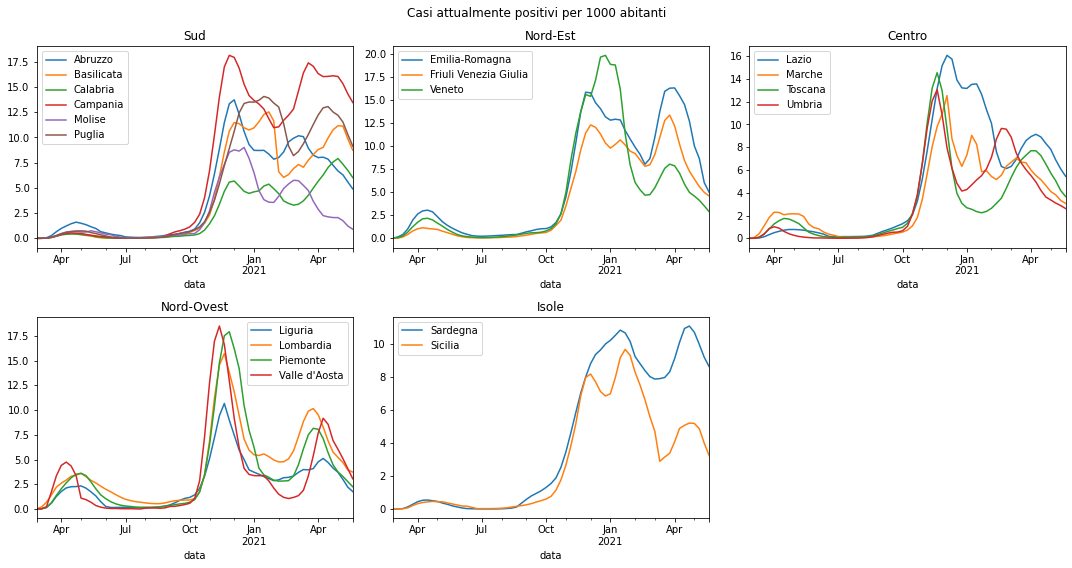

In [212]:
fig, axes = plt.subplots(2,3, figsize=(15, 8))
ax_flat = axes.flatten()
index = dict(zip(df_anag['descrizione_nuts_1'].unique(), list(range(df_anag['descrizione_nuts_1'].nunique()))))
for reg, group in df_reg.groupby('denominazione_regione'):
    if (reg != 'P.A. Bolzano')&(reg != 'P.A. Trento'):
        group['positivi_norm'] = group['totale_positivi']/pop_reg[reg]*1000

        group_week = group.set_index('data').resample('W').mean()
        ax = ax_flat[index[group_reg[reg]]]
        group_week.reset_index().plot.line('data', 'positivi_norm',ax=ax, label=reg)
        ax.set_title(group_reg[reg])
plt.legend(bbox_to_anchor=(1,1))
plt.suptitle('Casi attualmente positivi per 1000 abitanti')
fig.delaxes(ax_flat[-1])
fig.tight_layout()

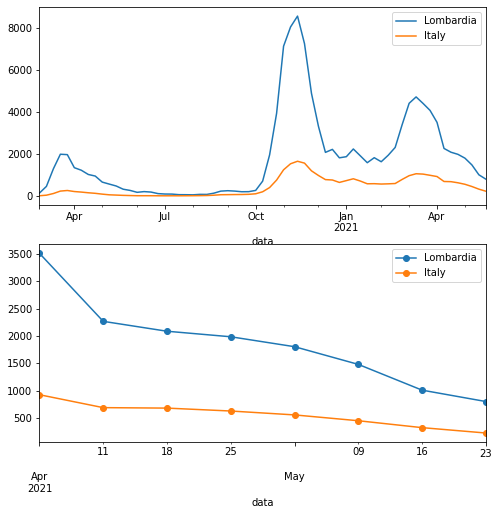

In [206]:
fig, ax = plt.subplots(2,1, figsize=(8,8))
lomb = df_reg[df_reg['denominazione_regione']=='Lombardia'].set_index('data').resample('W').mean()
#italy_nolomb = df_reg[df_reg['denominazione_regione']!='Lombardia'].set_index('data').resample('W').mean()
italy_nolomb = df_reg.set_index('data').resample('W').mean()
lomb.reset_index().plot('data', 'nuovi_positivi',label='Lombardia', ax=ax[0])
italy_nolomb.reset_index().plot('data', 'nuovi_positivi',label='Italy', ax=ax[0])
lomb.loc['04-01-2021':].reset_index().plot('data', 'nuovi_positivi', label='Lombardia', ax=ax[1], marker='o')
italy_nolomb.loc['04-01-2021':].reset_index().plot('data', 'nuovi_positivi', label='Italy', ax=ax[1], marker='o')
ax[1].legend(bbox_to_anchor=(1,1))
ax[0].legend(bbox_to_anchor=(1,1))